The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. 

Attribute Information:

1. fLength: continuous # major axis of ellipse [mm]
2. fWidth: continuous # minor axis of ellipse [mm]
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot]
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio]
5. fConc1: continuous # ratio of highest pixel over fSize [ratio]
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm]
7. fM3Long: continuous # 3rd root of third moment along major axis [mm]
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm]
9. fAlpha: continuous # angle of major axis with vector to origin [deg]
10. fDist: continuous # distance from origin to center of ellipse [mm]
11. class: g,h # gamma (signal), hadron (background)
g = gamma (signal): 12332
h = hadron (background): 6688


In [1]:
import pandas as pd
import numpy as np 
import scipy as sp 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
columns=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data",sep=',',names=columns)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
class_mapping = {'g':0,'h': 1}
df['class'] = df['class'].map(class_mapping)
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,1
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,1
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,1
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,1


In [4]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
dtype: int64

In [5]:
df.groupby('class').mean()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
class,,,,,,,,,,
0,43.654539,18.592698,2.784021,0.383641,0.215048,3.236653,17.809413,0.190873,18.784309,190.229712
1,70.943504,28.797373,2.900609,0.374217,0.213937,-18.287111,-2.848298,0.358245,43.985233,200.434517


In [6]:
df.corr(method='pearson')["class"].abs().sort_values(ascending=False)

class       1.000000
fAlpha      0.460979
fLength     0.307572
fWidth      0.265596
fM3Long     0.193409
fAsym       0.173587
fSize       0.117795
fDist       0.065203
fConc       0.024615
fConc1      0.004797
fM3Trans    0.003837
Name: class, dtype: float64

From the pearson correlation it seems that the features fAlpha and fLength are the 2 best features on this dataset

In [7]:
dummy=df.values

Y=dummy[:,10]
print(Y.shape)
X=dummy[:,:10]
print(X.shape)

(19020,)
(19020, 10)


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3)

In [9]:
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [10]:


N=10

k_bestfeatures = SelectKBest(score_func = f_classif)
rankings = k_bestfeatures.fit(X_train,y_train)
b=list(rankings.scores_)
a=list(range(0,len(b)))



sf = [g for _,g in sorted(zip(b,a))]
sf=sf[len(a)-N:len(a)]
c=1
sf=reversed(sf)
print(['order','feature','f-score'])
inx=[]
for chosen in sf:
    print(str(c)+'º: ', columns[chosen],"(",chosen,')   ', b[chosen])
    c+=1
    inx.append(chosen)
print(inx)

['order', 'feature', 'f-score']
1º:  fAlpha ( 8 )    3657.0258657624763
2º:  fLength ( 0 )    1386.6672298034105
3º:  fWidth ( 1 )    988.276103905443
4º:  fM3Long ( 6 )    540.4781390202368
5º:  fAsym ( 5 )    430.9965601843652
6º:  fSize ( 2 )    179.45735620471757
7º:  fDist ( 9 )    43.52998679572801
8º:  fConc ( 3 )    9.239358765396789
9º:  fConc1 ( 4 )    0.6326502618575047
10º:  fM3Trans ( 7 )    0.009320524519004093
[8, 0, 1, 6, 5, 2, 9, 3, 4, 7]


The highest f-scores seem to coincide with our previous pearson correlation analysis that fLength and fAlpha are the 2 best features

In [11]:
corr = np.corrcoef(X.T)
print(corr.shape)

(10, 10)


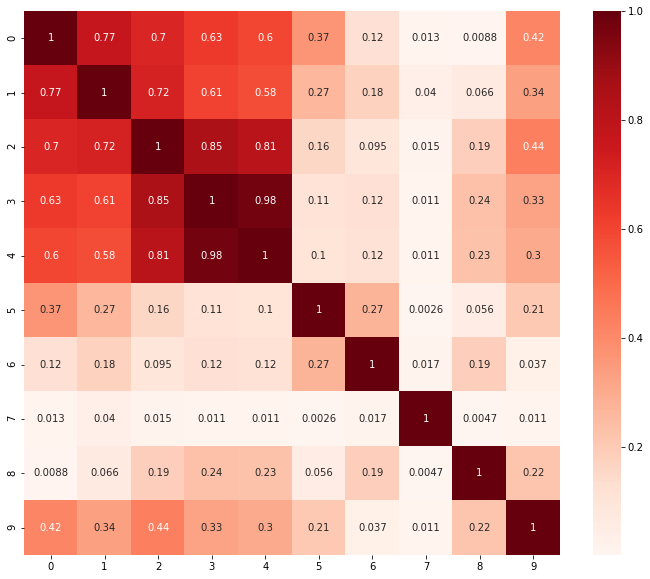

In [12]:
df = pd.DataFrame(X)
corr_matrix = df.corr().abs()
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)

[4]


As we can see on the heatmap, fConc1, index 4 has extremely high correlation with fConc, index 3, allowing us to drop it

In [14]:
df.drop(df[to_drop], axis=1)

,0,1,2,3,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,5.8043,-93.5224,-63.8389,84.6874,408.3166
